## Definición de modelo para encontrar pieza que falta del cuadrado

In [9]:
def fit_squares(grid):
    
    rows, cols = grid.shape

    square_list = []
    for r in range(rows-1):
        for c in range(cols-1):
            # Caso 1: 0 en la esquina superior izquierda [r,c]
            if grid[r,c] == 0 and grid[r+1,c] != 0 and grid[r,c+1] != 0 and grid[r+1,c+1] != 0:
                h = np.zeros(grid.shape)
                h[r,c] = 2
                h[r+1,c] = 1
                h[r,c+1] = 1
                h[r+1,c+1] = 1
                square_list.append(h)
            
            # Caso 2: 0 en la esquina inferior izquierda [r+1,c]
            elif grid[r,c] != 0 and grid[r+1,c] == 0 and grid[r,c+1] != 0 and grid[r+1,c+1] != 0:
                h = np.zeros(grid.shape)
                h[r,c] = 1
                h[r+1,c] = 2
                h[r,c+1] = 1
                h[r+1,c+1] = 1
                square_list.append(h)

            # Caso 3: 0 en la esquina superior derecha [r,c+1]
            elif grid[r,c] != 0 and grid[r+1,c] != 0 and grid[r,c+1] == 0 and grid[r+1,c+1] != 0:
                h = np.zeros(grid.shape)
                h[r,c] = 1
                h[r+1,c] = 1
                h[r,c+1] = 2
                h[r+1,c+1] = 1
                square_list.append(h)

            # Caso 4: 0 en la esquina inferior derecha [r+1,c+1]
            elif grid[r,c] != 0 and grid[r+1,c] != 0 and grid[r,c+1] != 0 and grid[r+1,c+1] == 0:
                h = np.zeros(grid.shape)
                h[r,c] = 1
                h[r+1,c] = 1
                h[r,c+1] = 1
                h[r+1,c+1] = 2
                square_list.append(h)

    return square_list

In [26]:
import  matplotlib.pyplot as plt

def graella_color(graella):
    sq = fit_squares(graella)

    piezas = np.array(sq)

    N = piezas.shape[0]
    soluciones = 0
    for selector_de_peces in itertools.product([0,1], repeat=N): # cada peça pot ser-hi o no, generam totes les combinacions possibles
      suma_de_peces = np.sum([pieza * (pieza == 1) for pieza in piezas[np.array(selector_de_peces, dtype=bool)]], axis=0)
      if  np.array_equal(suma_de_peces, graella):
        soluciones+=1
        pintar = np.zeros((*graella.shape, 3))

        for i, j in enumerate(selector_de_peces):
          if j:
            pieza = piezas[i]
            pintar[pieza == 1] =[0,0,1]
            pintar[pieza == 2] =[1,0,0]
        fig, grafica = plt.subplots(figsize=(5,5))
        grafica.imshow(pintar,interpolation="nearest")
        grafica.set_title(f"Solución {soluciones} ")
        plt.show()

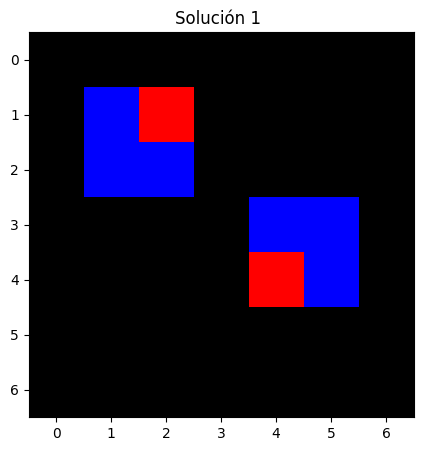

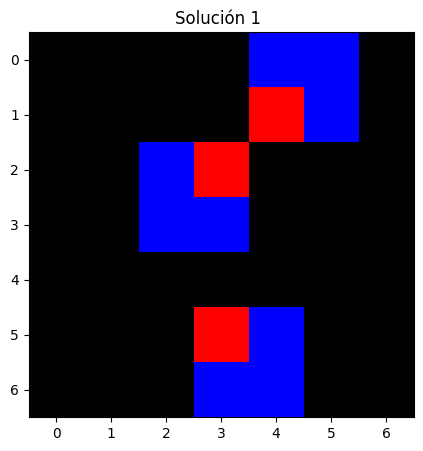

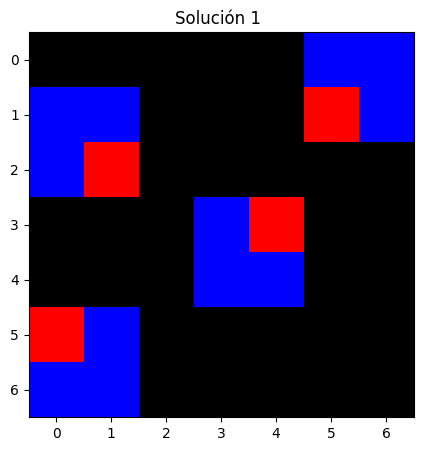

In [27]:
# Ejemplo 1 web entrenamiento
grid1 = np.array([
    [0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0],
    [0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0]
])


# Ejemplo 2 web entrenamiento
grid2 =np.array([
    [0,0,0,0,1,1,0],
    [0,0,0,0,0,1,0],
    [0,0,1,0,0,0,0],
    [0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0],
    [0,0,0,1,1,0,0]
])


# Ejemplo test web
grid3 = np.array([
    [0,0,0,0,0,1,1],
    [1,1,0,0,0,0,1],
    [1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,1,1,0,0],
    [0,1,0,0,0,0,0],
    [1,1,0,0,0,0,0]
])



graella_color(grid1)
graella_color(grid2)
graella_color(grid3)